# FAHA Cheat Sheet

Set your "working directory" to the folder holding your Notebook:

In [8]:
import os

os.path.abspath('')

'/home/stephbuon/projects/faha/extra'

#### Scrape text from Project Gutenberg

In [7]:
from urllib import request

urls = ['http://www.gutenberg.org/files/2554/2554-0.txt']

count = 0

for url in urls:
    count = count + 1

    response = request.urlopen(url)
    raw = response.read()
    text = raw.decode("utf-8-sig")

    fname = 'gutenburg_file_' + str(count)

    with open(fname, 'w+') as f:
        f.write(text)

#### Filtering List of Lists for Keyword

Filter data for sentences that include the keyword . . . 

In [9]:
import json
import re 

def data_import(fname):
    # Read file as list of lists. 
    # Then clean the list of lists 

    with open(fname, newline = '') as f:
            reader = json.loads(f.read()) # read the JSON file as a Python object 
            data = list(reader)[1:]
            data = list(map(str, data))

    data = [re.sub(r'\\\\n|\\\\t', '', word) for word in data] # remove line breaks and tab breaks
    data = [re.sub(r'[^\w\s]|_', '', word) for word in data] # remove punctuation and underscore
    data = [re.sub(r'\d{1, 3}', '', word) for word in data] # remove digits that are a minimum of 1 and a maximum of 3
    data = [re.sub(r'\w*\d\w*', '', word) for word in data] # remove character strings that contain a digit
        
    data = [word.lower() for word in data]
    data = [word.split() for word in data]

    data = [ls for ls in data if 'woman' in ls] # change to the keyword of interest

    return data

In [10]:
directory = os.path.abspath('')

directory

'/home/stephbuon/projects/faha/extra'

In [13]:
data = data_import(directory + '/congress_2001.json')

print(data[:5])

[['sentence', 'she', 'was', 'the', 'first', 'woman', 'to', 'serve', 'as', 'agriculture', 'secretary', 'in', 'california'], ['sentence', 'ms', 'veneman', 'will', 'be', 'the', 'first', 'woman', 'united', 'states', 'secretary', 'of', 'agriculture'], ['sentence', 'which', 'on', 'the', 'very', 'first', 'page', 'of', 'the', 'bible', 'tells', 'us', 'that', 'man', 'and', 'woman', 'have', 'been', 'created', 'in', 'his', 'very', 'image', 'and', 'likeness', 'cf'], ['sentence', 'a', 'young', 'woman', 'whose', 'poise'], ['sentence', 'i', 'told', 'the', 'story', 'of', 'the', 'young', 'new', 'jersey', 'woman', 'who', 'in', 'may', 'of', 'gave', 'birth', 'to', 'an', 'infant', 'in', 'a', 'public', 'bathroom', 'stall', 'during', 'her', 'senior', 'prom']]


#### Other (Code-Based) Resources:


- Lauren Klein's GitHub repository: https://github.com/laurenfklein
- Jo Guldi's "digital-history" GitHub repository: https://github.com/stephbuon/digital-history

#### Other (App-Based) Resources:

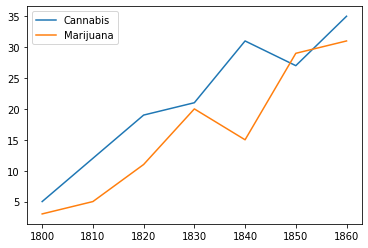

In [9]:
# Importing packages
import matplotlib.pyplot as plt

# Define data values
x = [1800, 1810, 1820, 1830, 1840, 1850, 1860]
y = [5, 12, 19, 21, 31, 27, 35]
z = [3, 5, 11, 20, 15, 29, 31]

# Plot a simple line chart
plt.plot(x, y)

# Plot another line on the same chart/graph
plt.plot(x, z)

plt.legend(['Cannabis', 'Marijuana'])

plt.show()